In [1]:
# Idea 

# Extract the 76*76 flux densities and flatten it to make 5776 array 
# Have 4563 of those array
# Make bins list 
# Histogram each one of them to get 4563 plots (4563 set of x values and y values) - Full histogram
#------------------------------------------------------------- Me dead here *sad*
# Make gaussian function
# Curve_fit all the 4563 histogram with the gaussian function - Still full histogram
# Get the peak of the gaussian curve
# Cut the histogram at that peak 
# Cut the x and the y dataset accordingly 
# Curve_fit and get the sigma 

In [2]:
from astropy.io import fits 
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit

## Import data

In [3]:
data = fits.open("/Users/natachaupra/Downloads/manga-8312-12701-LOGCUBE.fits.gz")

In [4]:
wave = data['WAVE'].data

In [5]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))

In [6]:
ivar = np.transpose(data["IVAR"].data, axes=(2, 1, 0))

### Get flux density and then flatten them out (Doing only 3 for now - let's see how it goes)

In [7]:
first = np.array(flux[:,:,500]).flatten()
second = np.array(flux[:,:,1000]).flatten()
third = np.array(flux[:,:,1500]).flatten()
fourth = np.array(flux[:,:,2000]).flatten()
fifth = np.array(flux[:,:,2500]).flatten()
sixth = np.array(flux[:,:,3000]).flatten()
seventh = np.array(flux[:,:,3500]).flatten()
eighth = np.array(flux[:,:,4000]).flatten()

#delete zeros 
first = np.delete(first, np.where(first == 0.0))
second = np.delete(second, np.where(second == 0.0))
third = np.delete(third, np.where(third == 0.0))
fourth = np.delete(fourth, np.where(fourth == 0.0))
fifth = np.delete(fifth, np.where(fifth == 0.0))
sixth = np.delete(sixth, np.where(sixth == 0.0))
seventh = np.delete(seventh, np.where(seventh == 0.0))
eighth = np.delete(eighth, np.where(eighth == 0.0))



print(len(first),len(second),len(third),len(fourth),len(fifth),len(sixth),len(seventh),len(eighth))

3349 3347 3334 3336 3346 3350 3356 3359


In [8]:
flux_density = (first,second,third,fourth,fifth,sixth,seventh,eighth)
# print(type(flux_density))
# print(flux_density)
# print(len(flux_density))
flux_density = np.array(flux_density,dtype = 'object')

# Process !!!!

In [9]:
# first I will have to histogram it (done)
# then I will have to make the gaussian function (done)
# then I will have to curve_fit the gaussian onto the full histogram (done)
# next I will have to find the peak of the gaussian (done)
# after that I will have to cut at said peak (done)
# then I will have to curve_fit again at the new half histogram (done)
# obtain the sigma value (done)

##### Note to self

In [10]:
# can use for loop here, but use one for loop to complete the whole process until I get sigma 

### Make histogram function 

In [11]:
def histogram(array, bins_lst):
    y,x = np.histogram(array, bins = bins_lst)
    return (y,x)
# returns a tuple of (y,x)

### Make gaussian function

In [12]:
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

### Make gaussian with fixed mean and amplitude (use the mean and amplitude from the first curve_fit)

#### Me, 2 days later : "And what is the difference between this one and the previous one again ?"

In [13]:
def gaussian_fixed(x, amp, mean, sigma):
    return amp * np.exp(-(x-mean)**2 / (2*sigma**2))

### Make bins_lst 

In [14]:
# counter = -0.04
# bins_lst = [-0.04]
# for i in range(3500):
#     counter += 0.0003
#     bins_lst.append(counter)


bins_lst = np.arange(-0.04,1,0.0003)
# bins_lst = np.arange(-0.04,0.1,0.0005)
#use np.arange - one liner 


# Loop the thing 

sigma with fixed mean and amplitude =  0.022961532752457416

sigma with fixed mean and amplitude =  0.016954438334396443

sigma with fixed mean and amplitude =  0.012958321924591808

sigma with fixed mean and amplitude =  0.012039090677404008

sigma with fixed mean and amplitude =  0.009663866104978673

sigma with fixed mean and amplitude =  0.008858118587841565

sigma with fixed mean and amplitude =  0.00794618444538643

sigma with fixed mean and amplitude =  0.010187582672117824

CPU times: user 25.1 s, sys: 5.45 s, total: 30.6 s
Wall time: 23.1 s


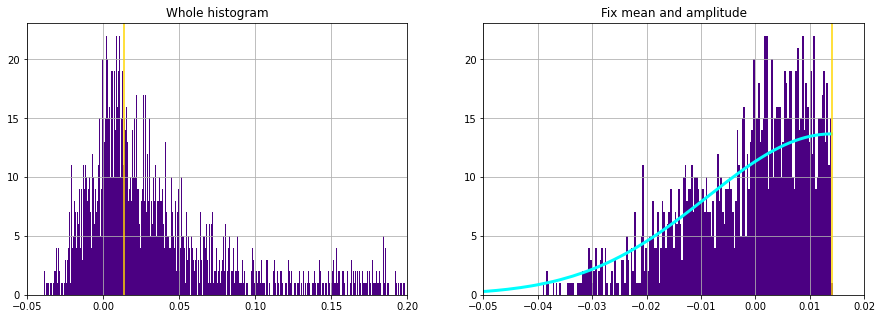

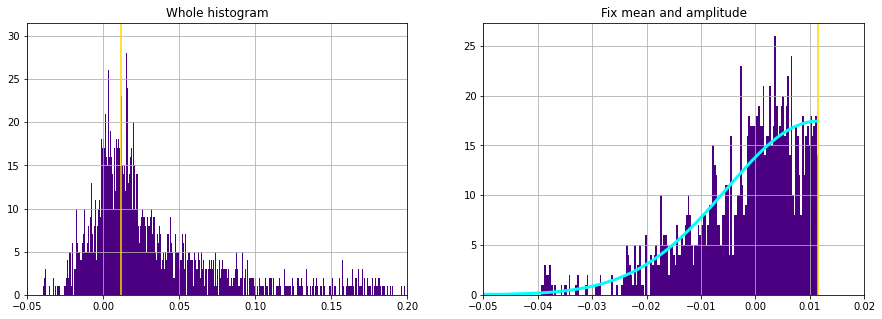

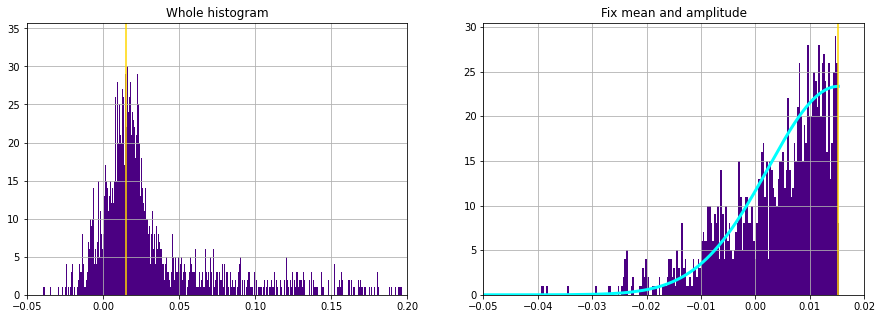

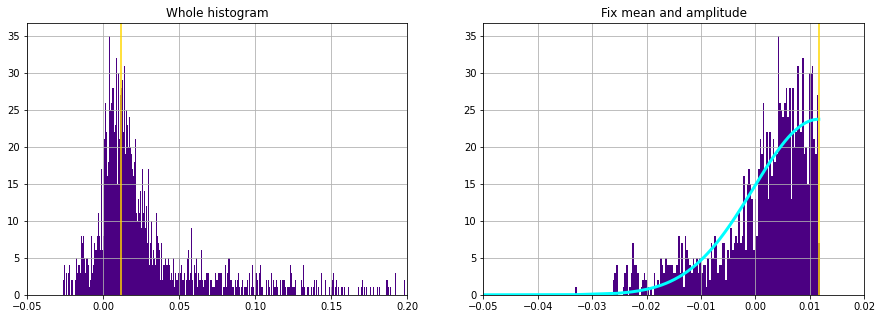

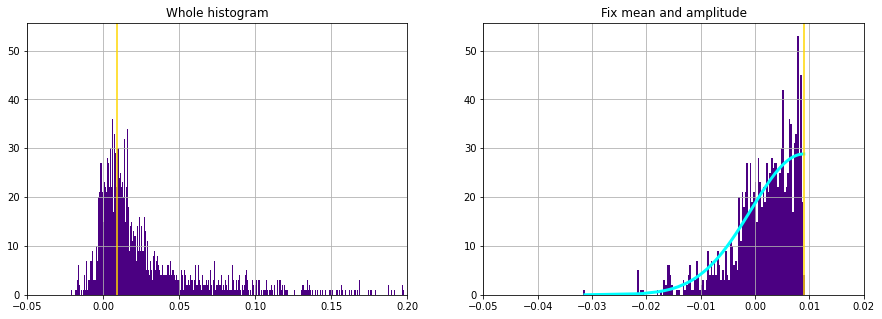

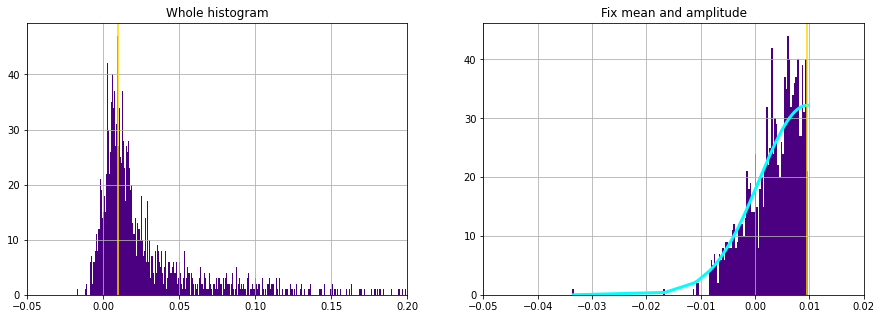

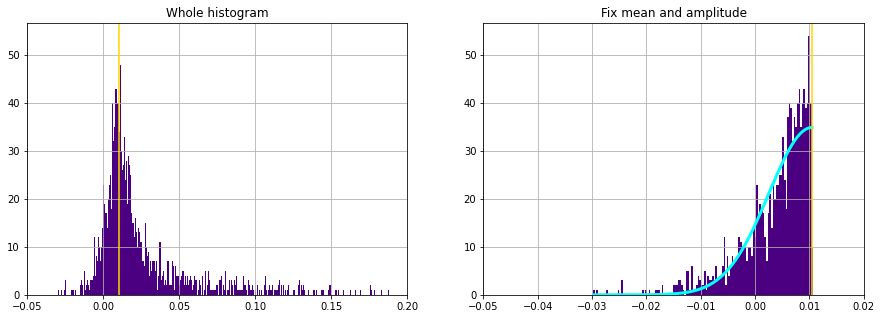

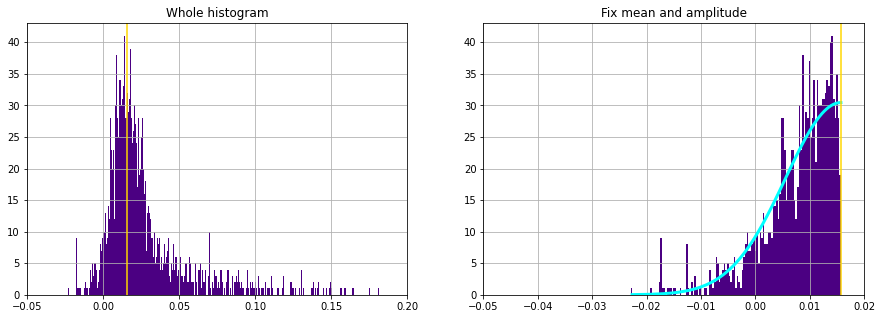

In [15]:
%%time

for i in flux_density:
    
    # Sort i for later use
    
    i = sorted(i) 

    # histogram on every wavelength in my flux_density array to get x, y data 
    # making a subplot
    
#     fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (15,15))
    fig, (ax1,ax6) = plt.subplots(1,2, figsize = (15,5))
    
    ax1.hist(i, bins = bins_lst, color = 'indigo')
    ax1.set_xlim(-0.05,0.2)
    ax1.grid()
    ax1.set_title('Whole histogram')
    
    yx = histogram(i, bins_lst)

    y = yx[0]
    x = yx[1]
    
    # Remove the right-most bin edge value
    
    x = np.delete(x, -1)
    
    # ------------------------------------------------------
    
    # gaussian fit the whole histogram
    
    popt, pcov = curve_fit(gaussian, x, y)
    
    # ------------------------------------------------------
    
    # mean would be the second element in popt ---> popt[1]
    # this is where I will cut the histogram (by prolly slicing the array)
    # cut the mean in the x data array 
    
    amp = popt[0]
    mean = popt[1] 
    
    index = np.where(x > mean)
    
#     print(index,index[0],index[0][0])
    # ------------------------------------------------------
    
    # cut the x and the y data to only half histogram
    
    x = x[:index[0][0]]
    y = y[:index[0][0]]
        
    cut = np.where(i < mean)
    
    i = i[:cut[-1][-1]]
    
    # ------------------------------------------------------
    
    ax1.axvline(x = mean, color = 'gold')
    
    # Plot the cut histogram (ax2)
    
#     ax2.grid()
#     ax2.hist(i, bins = bins_lst, color = 'palevioletred')
#     ax2.axvline( x = mean, color = 'royalblue')
#     ax2.set_xlim(-0.05, 0.02)
#     ax2.set_title('Histogram after the cut')
    
    #-------------------------------------------------------
    
    # Curve_fit again to get the sigma values
    
#     popt1, pcov1 = curve_fit(gaussian, x, y)
#     popt2, pcov2 = curve_fit(lambda x, amp, sigma: gaussian(x, amp, mean, sigma), x, y, p0 = [amp, 0.008])
#     popt3, pcov3 = curve_fit(lambda x, mean, sigma: gaussian(x, amp, mean, sigma), x, y, p0 = [mean, 0.008])
    popt4, pcov4 = curve_fit(lambda x, sigma: gaussian_fixed(x, amp, mean, sigma), x, y, p0 = [0.008])
    
    #-------------------------------------------------------
    
    # Plot the gaussian distribution
    
#     ax3.plot(x,gaussian(x, popt1[0], popt1[1], popt1[2]), color = 'black')
#     ax3.hist(i, bins = bins_lst, color = 'palevioletred')
#     ax3.grid()
#     ax3.set_title('Fix nothing')
#     ax3.axvline(x = mean, color = 'royalblue')
#     ax3.set_xlim(-0.05, 0.02)

    
#     ax2.plot(i,gaussian(i, popt2[0], mean, popt2[1]), color = 'black')
#     ax2.hist(i, bins = bins_lst, color = 'mediumaquamarine')
#     ax2.grid()
#     ax2.set_title('Fix mean only')
#     ax2.axvline(x = mean, color = 'crimson')
#     ax2.set_xlim(-0.05, 0.02)
    
#     ax5.plot(i,gaussian(i, amp, popt3[0], popt3[1]), color = 'black')
#     ax5.hist(i, bins = bins_lst, color = 'palevioletred')
#     ax5.grid()
#     ax5.set_title('Fix amplitude only')
#     ax5.axvline(x = mean, color = 'royalblue')
#     ax5.set_xlim(-0.05, 0.02)
    
    ax6.plot(i,gaussian(i, amp, mean, popt4[0]), color = 'aqua', linewidth = 3)
    ax6.hist(i, bins = bins_lst, color = 'indigo')
    ax6.grid()
    ax6.set_title('Fix mean and amplitude')
    ax6.axvline(x = mean, color = 'gold')
    ax6.set_xlim(-0.05, 0.02)
        
    #-------------------------------------------------------
#     print('sigma = ', popt1[2])
#     print('sigma with fixed mean only = ', popt2[-1])
#     print('sigma with fixed amplitude only = ', popt3[-1])
    print('sigma with fixed mean and amplitude = ', popt4[0])
    print()

### The question is : the sigma I just found above is it the avg sigma of the whole wavelength ? Or what sigma is this ? 

I guess it is the avg sigma of the whole wavelength, given the method I did to obtain it, plus the IVAR value is very similar to this too.

The reason the number ain't exact I guess it's because the peak where I cut the histogram. 

In [16]:
wave[500],wave[1000],wave[1500],wave[2000],wave[2500],wave[3000],wave[3500],wave[4000]

(4063.4975290390294,
 4559.319216592223,
 5115.640300070042,
 5739.842822249425,
 6440.209571356517,
 7226.033988634146,
 8107.743486660741,
 9097.037814779893)

## Checking the IVAR data 

In [17]:
first_ivar = np.array(ivar[:, :, 3000]).flatten()
second_ivar = np.array(ivar[:,:,3001]).flatten()
third_ivar = np.array(ivar[:,:,3002]).flatten()

In [18]:
iv = (first_ivar,second_ivar,third_ivar)
iv = np.array(iv)

In [19]:
ivar1 = np.sqrt(first_ivar)
ivar2 = np.sqrt(second_ivar)
ivar3 = np.sqrt(third_ivar)

In [20]:
ivar1 = np.sum(ivar1)
ivar2 = np.sum(ivar2)
ivar3 = np.sum(ivar3)

In [21]:
ivar1 = ivar1 / len(first_ivar)
ivar2 = ivar2 / len(second_ivar)
ivar3 = ivar3 / len(third_ivar)

In [22]:
ivar1 = 1/ivar1
ivar2 = 1/ivar2
ivar3 = 1/ivar3
ivar1, ivar2, ivar3

(0.01244221564496603, 0.012096115005237471, 0.01206497482949587)

In [23]:
for i in iv: 
    iv_ = np.sqrt(i)
    iv_ = np.sum(iv_)
    iv_1 = iv_ / len(first_ivar)
    iv_ = iv_ / len(first)
    iv_ = 1/iv_
    iv_1 = 1/iv_1
    print('sigma (?) when divided by array with zero removed = ', iv_)
    print('sigma (?) when divided by array without zero removed = ', iv_1)
    print()

sigma (?) when divided by array with zero removed =  0.007214158621016488
sigma (?) when divided by array without zero removed =  0.01244221564496603

sigma (?) when divided by array with zero removed =  0.00701348496408246
sigma (?) when divided by array without zero removed =  0.012096115005237471

sigma (?) when divided by array with zero removed =  0.00699542948476137
sigma (?) when divided by array without zero removed =  0.01206497482949587



In [24]:
for i in range(2000,2500):
    print(i, first_ivar[i])
    
# ivar at each spaxel at a random wavelength (index 3000 in this case) has different values 

2000 23874.238
2001 19319.613
2002 18916.715
2003 22113.229
2004 17397.844
2005 19840.232
2006 21807.203
2007 16925.672
2008 19495.807
2009 22749.51
2010 17979.549
2011 19201.924
2012 21790.82
2013 15735.417
2014 19183.996
2015 23237.174
2016 17247.97
2017 18912.695
2018 24741.701
2019 21371.926
2020 20801.332
2021 25653.646
2022 21053.041
2023 22697.424
2024 24862.094
2025 20374.793
2026 23060.332
2027 25254.879
2028 20508.422
2029 23325.84
2030 25006.717
2031 21371.596
2032 24575.75
2033 25212.508
2034 19294.266
2035 20757.625
2036 20775.219
2037 17939.002
2038 21550.32
2039 20525.357
2040 15354.682
2041 14994.906
2042 16742.207
2043 10211.479
2044 3042.3552
2045 0.0
2046 0.0
2047 0.0
2048 0.0
2049 0.0
2050 0.0
2051 0.0
2052 0.0
2053 0.0
2054 0.0
2055 0.0
2056 0.0
2057 0.0
2058 0.0
2059 0.0
2060 26728.957
2061 22478.182
2062 16923.184
2063 22629.273
2064 29218.176
2065 24405.434
2066 20953.775
2067 29306.28
2068 23305.79
2069 22386.883
2070 28641.412
2071 20542.768
2072 20091.77
2073